# Eigendecomposition and Singular Value Decomposition

Latent Semantic Analysis (LSA) is an application of the singular value decomposition (SVD) in natural language processing and information retrieval. 

First of all, let's recall what it does. In its heart this is a data compression technique. Let's start with a simple example that you may recall from linear algebra.

A square matrix represents a linear transformation within a vector space. For example, let's how the following matrix maps one vector to another in the plane. Note that this matrix is quite special (symmetric):

$$
A = \begin{pmatrix}
2 & -1.5 \\
-1.5 & 2
\end{pmatrix}
$$



In [1]:
import numpy as np
import plotly.graph_objects as go

# Define the matrix A
A = np.array([[2, -1.5], [-1.5, 2]])

# Define the vectors
v1 = np.array([1, 0])
v2 = np.array([-1, 3])

# Compute images under A
Av1 = A @ v1
Av2 = A @ v2

# Compute eigenvectors of A
eigenvalues, eigenvectors = np.linalg.eig(A)
e1 = eigenvectors[:, 0]
e2 = eigenvectors[:, 1]

# Create the plot
fig = go.Figure()

# Add eigenvector lines extending across the plot
scale = 10  # Extend lines
fig.add_trace(go.Scatter(
    x=[-scale * e1[0], scale * e1[0]],
    y=[-scale * e1[1], scale * e1[1]],
    mode='lines',
    name=f'Eigenvector 1 (λ={eigenvalues[0]:.2f})',
    line=dict(color='gray', width=1, dash='dot'),
    showlegend=True
))

fig.add_trace(go.Scatter(
    x=[-scale * e2[0], scale * e2[0]],
    y=[-scale * e2[1], scale * e2[1]],
    mode='lines',
    name=f'Eigenvector 2 (λ={eigenvalues[1]:.2f})',
    line=dict(color='darkgray', width=1, dash='dot'),
    showlegend=True
))

# Add original vectors
fig.add_trace(go.Scatter(
    x=[0, v1[0]], y=[0, v1[1]],
    mode='lines+markers',
    name='v1',
    line=dict(color='blue', width=2),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=[0, v2[0]], y=[0, v2[1]],
    mode='lines+markers',
    name='v2',
    line=dict(color='red', width=2),
    marker=dict(size=8)
))

# Add eigenvectors
fig.add_trace(go.Scatter(
    x=[0, e1[0]], y=[0, e1[1]],
    mode='lines+markers',
    name='e1',
    line=dict(color='green', width=2),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=[0, e2[0]], y=[0, e2[1]],
    mode='lines+markers',
    name='e2',
    line=dict(color='purple', width=2),
    marker=dict(size=8)
))

# Add transformed vectors
fig.add_trace(go.Scatter(
    x=[0, Av1[0]], y=[0, Av1[1]],
    mode='lines+markers',
    name='A·v1',
    line=dict(color='lightblue', width=2, dash='dash'),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=[0, Av2[0]], y=[0, Av2[1]],
    mode='lines+markers',
    name='A·v2',
    line=dict(color='lightcoral', width=2, dash='dash'),
    marker=dict(size=8)
))

# Add transformed eigenvectors
Ae1 = A @ e1
Ae2 = A @ e2

fig.add_trace(go.Scatter(
    x=[0, Ae1[0]], y=[0, Ae1[1]],
    mode='lines+markers',
    name='A·e1',
    line=dict(color='lightgreen', width=2, dash='dash'),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=[0, Ae2[0]], y=[0, Ae2[1]],
    mode='lines+markers',
    name='A·e2',
    line=dict(color='plum', width=2, dash='dash'),
    marker=dict(size=8)
))

# Update layout
fig.update_layout(
    title='Vectors and their Images under Matrix A',
    xaxis_title='x',
    yaxis_title='y',
    xaxis=dict(zeroline=True, zerolinewidth=2, zerolinecolor='black'),
    yaxis=dict(zeroline=True, zerolinewidth=2, zerolinecolor='black'),
    showlegend=True,
    width=600,
    height=600
)

fig.show()

In [2]:
e1

array([ 0.70710678, -0.70710678])

In [3]:
np.acos(np.dot(v2, Av2) / (np.linalg.norm(v2) * np.linalg.norm(Av2))) * 180 / np.pi

np.float64(22.479434397103123)

In [4]:
np.acos(np.dot(v1, Av1) / (np.linalg.norm(v1) * np.linalg.norm(Av1))) * 180 / np.pi

np.float64(36.86989764584401)

We can show that A (the whole transformation) can be represented using two steps

- Only rotation
- Scaling 
- Only rotation

$$
A = V \Lambda V^T
$$

Where V is a rotation matrix (orthogonal) and Lambda is a scaling matrix (diagonal).

In [5]:
eigenvectors_inv = np.linalg.inv(eigenvectors)
print(eigenvectors_inv)

print(np.linalg.norm(eigenvectors_inv.T @ v1))

print(np.linalg.norm(v1))

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
1.0
1.0


In [6]:
np.linalg.norm(eigenvectors @ v1)

np.float64(1.0)

In [7]:
np.linalg.norm(eigenvectors_inv @ v1)

np.float64(1.0)

## Singular Value Decomposition (SVD)

The eigen-decomposition works only for square matrices. For rectangular matrices we can derive a similar decomposition in the form of 

$$
A = \underbrace{\begin{pmatrix} 
u_{11} & u_{12} & u_{13} & \ldots & u_{1n} \\
u_{21} & u_{22} & u_{23} & \ldots & u_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
u_{n1} & u_{n2} & u_{n3} & \ldots & u_{nn} 
\end{pmatrix}}_{n \times n}
\underbrace{\begin{pmatrix}
\sigma_1 & 0 & 0 & \ldots & 0 \\
0 & \sigma_2 & 0 & \ldots & 0 \\
0 & 0 & \sigma_3 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \sigma_m
\end{pmatrix}}_{n \times m}
\underbrace{\begin{pmatrix}
v_{11} & v_{12} & v_{13} & \ldots & v_{1m} \\
v_{21} & v_{22} & v_{23} & \ldots & v_{2m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
v_{m1} & v_{m2} & v_{m3} & \ldots & v_{mm}
\end{pmatrix}}_{m \times m} = U \Sigma V^T
$$

where U and V are orthogonal matrices (rotations) and Sigma is a diagonal matrix (scaling). The values on the diagonal of Sigma are called singular values.

## Rethinking Matrix Multiplication

To see why this representation is useful, let's revisit how we can think about matrix multiplication using a single example. The way matrix multiplication is usually presented in linear
algebra classes is often the least useful one. For example, consider the multiplication of two 2x2 matrices.

$$
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix} =
\begin{pmatrix}
1 a + 2 c & 1 b + 2 d \\
3 a + 4 c & 3 b + 4 d \\
\end{pmatrix}
$$


### Weighted Sums of Columns

Another way to think about this multiplication is that each column of the left matrix constructs a linear combination of the columns of the right matrix.

$$
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix} =
\begin{pmatrix}
a \begin{pmatrix} 1 \\ 3 \end{pmatrix} + c \begin{pmatrix} 2 \\ 4 \end{pmatrix} & b \begin{pmatrix} 1 \\ 3 \end{pmatrix} + d \begin{pmatrix} 2 \\ 4 \end{pmatrix}
\end{pmatrix}
= \begin{pmatrix}
1 a + 2 c & 1 b + 2 d \\
3 a + 4 c & 3 b + 4 d
\end{pmatrix}
$$

The latter way of thinking about the multiplication is useful when we think about regression models where the coefficients weight different features (columns) to produce predictions.

### Sum of Outer Products

For understanding the SVD we need a third way of thinking about matrix multiplication and it is as a sum of outer products of the columns of the left matrix and the rows of the right matrix.

$$
\begin{align*}
\begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}
\begin{pmatrix}
a & b \\
c & d \\
\end{pmatrix}
& = \begin{pmatrix} 1 \\ 3 \end{pmatrix} \begin{pmatrix} a & b \end{pmatrix} + \begin{pmatrix} 2 \\ 4 \end{pmatrix} \begin{pmatrix} c & d \end{pmatrix} \\
& = \begin{pmatrix}
1 a & 1 b \\
3 a & 3 b \\
\end{pmatrix} +
\begin{pmatrix}
2 c & 2 d \\
4 c & 4 d \\
\end{pmatrix} \\
& = \begin{pmatrix}
1 a + 2 c & 1 b + 2 d \\
3 a + 4 c & 3 b + 4 d \\
\end{pmatrix}
\end{align*}
$$

The outer product representation of matrix multiplication is very useful in the eigendecomposition and SVD case because it shows how we can build up a matrix by summing layers of simpler matrices.

If $u_{:i}$ is the i-th column of U and $v_{:i}$ is the i-th column of V, then we can write the SVD as

$$
A = u_{:1} \sigma_1 v_{:1}^T + u_{:2} \sigma_2 v_{:2}^T + \ldots + u_{:r} \sigma_r v_{:r}^T
$$

or more compactly

$$
A = \sum_{i=1}^{r} u_{:i} \sigma_i v_{:i}^T
$$


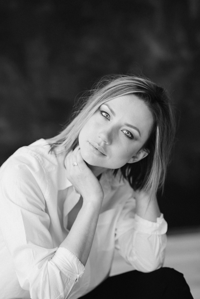

In [8]:
from PIL import Image
import requests
from io import BytesIO
# Load the image as grayscale

url = "https://raw.githubusercontent.com/febse/data/refs/heads/main/ta/example_photo.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("L")
img = img.resize((200, int(img.height * 200 / img.width)))
display(img)


In [9]:
# Convert the grayscale PIL image to a NumPy array and display as numbers
img_matrix = np.array(img)
print(img_matrix)
print("Shape:", img_matrix.shape, "Dtype:", img_matrix.dtype)

[[ 24  26  25 ...  36  34  30]
 [ 25  25  27 ...  35  32  30]
 [ 24  25  24 ...  34  31  30]
 ...
 [213 214 215 ... 157 156 155]
 [214 214 211 ... 155 155 153]
 [211 209 204 ... 152 152 152]]
Shape: (299, 200) Dtype: uint8


In [10]:
# Do a SVD on the image matrix

U, S, VT = np.linalg.svd(img_matrix, full_matrices=False)


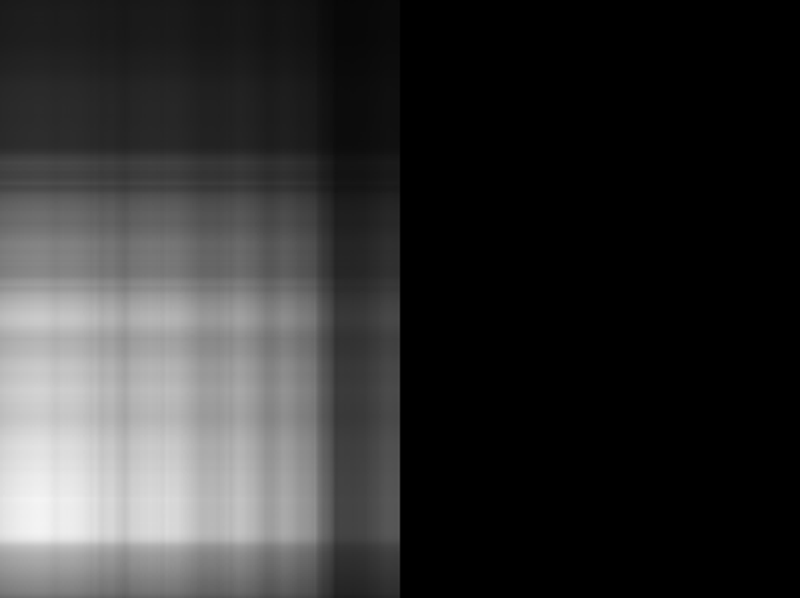

In [11]:
# Compute the outer product of the first column of U with the first row of VT scaled by the first singular value

comp_n = 0

rank1_component = S[comp_n] * np.outer(U[:, comp_n], VT[comp_n, :])

# Convert to uint8 and display
rank1_uint8 = np.clip(rank1_component, 0, 255).astype(np.uint8)
rank1_pil = Image.fromarray(rank1_uint8)
# display(rank1_pil.resize((400, int(rank1_pil.height * 400 / rank1_pil.width))))

# Reconstruct the image using only the first singular value
img_rank1 = U[:, 0:comp_n] @ np.diag(S[0:comp_n]) @ VT[0:comp_n, :]

# Convert to uint8 and display
img_rank1_uint8 = np.clip(img_rank1, 0, 255).astype(np.uint8)
img_rank1_pil = Image.fromarray(img_rank1_uint8)
# display(img_rank1_pil.resize((400, int(img_rank1_pil.height * 400 / img_rank1_pil.width))))

# Show both images side by side for comparison
combined_width = rank1_pil.width + img_rank1_pil.width
combined_height = max(rank1_pil.height, img_rank1_pil.height)
combined_image = Image.new('L', (combined_width, combined_height))
combined_image.paste(rank1_pil, (0, 0))
combined_image.paste(img_rank1_pil, (rank1_pil.width, 0))
# Display them side by side in one row
display(combined_image.resize((800, int(combined_image.height * 800 / combined_image.width))))

## A simpler example of SVD

Let's look at a probably more familiar example of a matrix with data on two correlated variables. The data is simulated
but loosely resembles real world data on adult human heights and weights.

Text(0.5, 1.0, 'Simulated height/weight data')

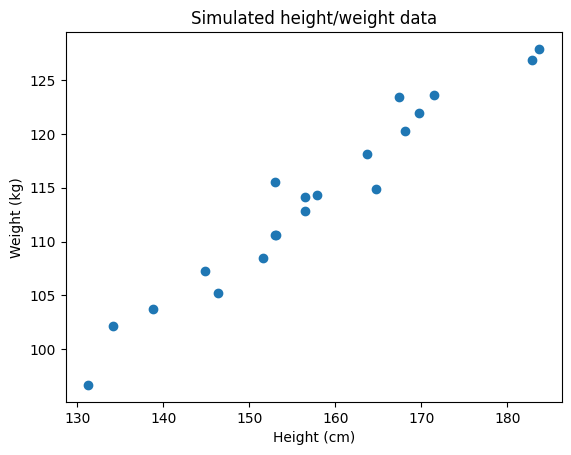

In [28]:
np.random.seed(42)

n = 20

x = np.random.normal(160, 15, size=n)
y = 20 + 0.6 * x  + np.random.normal(0, 2, n)

XY = np.vstack([x, y]).T

import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Simulated height/weight data")



In [29]:
XY.shape

(20, 2)

In [30]:
x

array([167.4507123 , 157.92603548, 169.71532807, 182.84544785,
       156.48769938, 156.48794565, 183.68819223, 171.51152094,
       152.95788421, 168.13840065, 153.04873461, 153.0140537 ,
       163.62943407, 131.30079633, 134.12623251, 151.56568706,
       144.80753319, 164.71370999, 146.37963887, 138.81544448])

In [32]:
U, S, VT = np.linalg.svd(XY - XY.mean(axis=0), full_matrices=False)

In [35]:
print("U:\n", U)
print("S:\n", S)
print("VT:\n", VT)

U:
 [[-0.18495937 -0.43096789]
 [-0.00851371 -0.01042759]
 [-0.20183605 -0.09965866]
 [-0.39180996  0.23673043]
 [ 0.01901166  0.06821548]
 [ 0.00988015 -0.08877835]
 [-0.4091504   0.16979066]
 [-0.23496022 -0.17637702]
 [ 0.07645441  0.08737065]
 [-0.17152034 -0.01106229]
 [ 0.07501099  0.08748036]
 [ 0.04138682 -0.50037228]
 [-0.10301914 -0.07045792]
 [ 0.43045171  0.23170853]
 [ 0.35890939 -0.22329469]
 [ 0.10744006  0.23819436]
 [ 0.19600524 -0.09345426]
 [-0.09331582  0.39404843]
 [ 0.19217956  0.27225253]
 [ 0.29235502 -0.08094046]]
S:
 [72.64901972  7.20081752]
VT:
 [[-0.86256061 -0.50595375]
 [ 0.50595375 -0.86256061]]


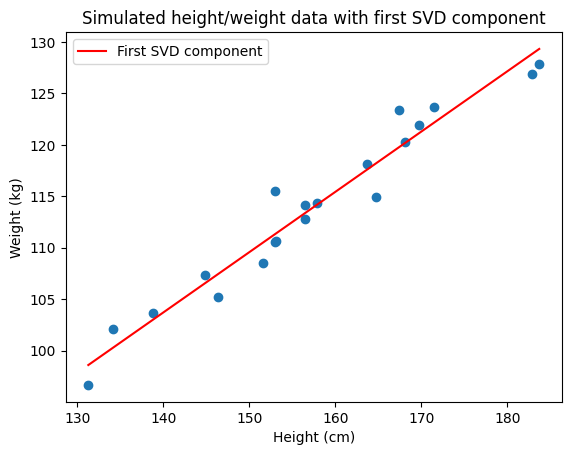

In [37]:
# Plot the direction of the first VT vector as a whole line on top of the scatter plot

plt.scatter(x, y)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Simulated height/weight data with first SVD component")
slope = VT[0, 1] / VT[0, 0]
intercept = XY.mean(axis=0)[1] - slope * XY.mean(axis=0)[0]
x_vals = np.array([min(x), max(x)])
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label='First SVD component')
plt.legend()


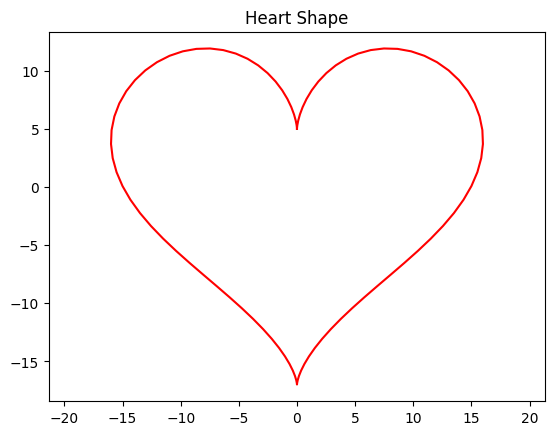

In [38]:
# Draw a heart in 2D using parametric equations

t = np.linspace(0, 2 * np.pi, 100)
x_heart = 16 * np.sin(t)**3
y_heart = 13 * np.cos(t) - 5 * np.cos(2 * t) - 2 * np.cos(3 * t) - np.cos(4 * t)

plt.plot(x_heart, y_heart, color='red')
plt.title("Heart Shape")
plt.axis('equal')
plt.show()

In [40]:
# Draw the heart shape in 3D by adding a z coordinate with some noise
# using plotly

z_heart = np.random.normal(0, 1, size=t.shape)

fig = go.Figure(data=[go.Scatter3d(
    x=x_heart,
    y=y_heart,
    z=z_heart,
    mode='markers',
    marker=dict(
        size=3,
        color='red',
    )
)])

fig.update_layout(
    title='3D Heart Shape',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    width=700,
    height=700
)